### Задание 1 ###

In [ ]:
# Скачиваем данные из эксель файлов в облаке, где они были предобработаны.
# Файлы аналогичны тем, что приложены к письму

In [ ]:
!wget -O Looks_Data https://www.dropbox.com/s/uwk881e9zj6ztpo/Looks_Data%20%281%29.xlsx?dl=0

--2020-10-22 04:41:40--  https://www.dropbox.com/s/uwk881e9zj6ztpo/Looks_Data%20%281%29.xlsx?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/uwk881e9zj6ztpo/Looks_Data%20%281%29.xlsx [following]
--2020-10-22 04:41:41--  https://www.dropbox.com/s/raw/uwk881e9zj6ztpo/Looks_Data%20%281%29.xlsx
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc908a626a0ff9726fd3a728f5d5.dl.dropboxusercontent.com/cd/0/inline/BBvGH3NOH3JnLL-BYED5beWP1kQAf2ZlRDXpnce_icEv6P-9jhXF2Jj7CaSWFlqv6XDA8vJSs7ex_UOKGowcVXjrwO3zOXC9X--1ZVYhLpniWRdG-VYdBnQJcHKxwFDEn6k/file# [following]
--2020-10-22 04:41:41--  https://uc908a626a0ff9726fd3a728f5d5.dl.dropboxusercontent.com/cd/0/inline/BBvGH3NOH3JnLL-BYED5beWP1kQAf2ZlRDXpnce_icEv6P-9jhXF2Jj7CaSWFlqv6XDA8v

In [ ]:
!wget -O Reg_data https://www.dropbox.com/s/e4rpws4al48x3ll/Reg_data2.xlsx?dl=0

--2020-10-22 04:41:42--  https://www.dropbox.com/s/e4rpws4al48x3ll/Reg_data2.xlsx?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/e4rpws4al48x3ll/Reg_data2.xlsx [following]
--2020-10-22 04:41:42--  https://www.dropbox.com/s/raw/e4rpws4al48x3ll/Reg_data2.xlsx
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc97c548f7d3d613be2f0b40dd17.dl.dropboxusercontent.com/cd/0/inline/BBvX6Comt3eXekF0Lv7yQS-7bu6TIYsI4o4VjXaysMdxQu0DZtrMPgcOoZKcsh_amIFKQZxo1YzTHYsh5rs1vtyYzbE_lJppr6Bx1dehgyJTD2f5NgYg2ODiE9jETqulHDE/file# [following]
--2020-10-22 04:41:42--  https://uc97c548f7d3d613be2f0b40dd17.dl.dropboxusercontent.com/cd/0/inline/BBvX6Comt3eXekF0Lv7yQS-7bu6TIYsI4o4VjXaysMdxQu0DZtrMPgcOoZKcsh_amIFKQZxo1YzTHYsh5rs1vtyYzbE_lJppr6Bx1de

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt

from scipy.stats import shapiro

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
file = 'Reg_data'
xl = pd.ExcelFile(file)
print(xl.sheet_names)

['Sheet1', 'Sheet3', 'Panel ', 'Sheet2', 'Transactions', 'Footfall', 'Usage']


In [ ]:
df = xl.parse('Sheet3')
df.head(5)

,t,y1,x1,y2,x2,y3,x3,y5,x5,y6,x6,y7,x7,y8,x8,y9,x9,y10,x10
0,2020-08-23,0.559486,0.183280,0.590909,0.139614,0.500000,0.109551,0.461538,0.025641,0.573276,0.224138,0.521739,0.046377,0.715000,0.080000,0.653153,0.180180,0.458333,0.009804
1,2020-08-24,0.601467,0.173594,0.611111,0.133320,0.769679,0.116618,0.541667,0.057292,0.708333,0.023810,0.558317,0.139579,0.527950,0.354037,0.693333,0.211111,0.466667,0.046154
2,2020-08-25,0.599034,1.000000,0.702479,0.203857,0.751678,0.224832,0.558252,0.072816,0.653846,0.254438,0.523711,0.123711,0.676871,0.295918,0.649510,0.147059,0.532000,0.036000
3,2020-08-26,0.566929,0.238845,0.626667,0.180000,0.595420,0.216285,0.517391,0.113043,0.672922,0.302949,0.590909,0.097403,0.546032,0.095238,0.680357,0.383929,0.538462,0.084428
4,2020-08-27,0.610465,0.377907,0.639903,0.097324,0.917969,0.128906,0.482051,0.241026,0.729630,0.403704,0.632653,0.117347,0.622378,0.265734,0.695545,0.861386,0.541590,0.029575


In [ ]:
# Магазин №9 удален, так как там всего 4 наблюдения для переменной Х
# Построим регрессии для каждого магазина и добавим их в список
model_list = []
shops_ind = [1, 2, 3, 5, 6, 7, 8, 9, 10]
for i in shops_ind:
  mod = sm.OLS(np.array(df['y{}'.format(i)]), np.array(df['x{}'.format(i)]))
  res = mod.fit()
  model_list.append(res)


In [ ]:
print(model_list[0].summary()) # пример объектов в списке model_list

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.580
Model:                            OLS   Adj. R-squared (uncentered):              0.566
Method:                 Least Squares   F-statistic:                              40.07
Date:                Thu, 22 Oct 2020   Prob (F-statistic):                    6.47e-07
Time:                        04:41:44   Log-Likelihood:                         -16.386
No. Observations:                  30   AIC:                                      34.77
Df Residuals:                      29   BIC:                                      36.17
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
model_params, model_f, model_pvalue_f, model_tvalues, model_pvalues_t, model_r2, model_r2_adj = ([] for i in range(7))
model_shapiro, model_pvalue_shapiro, model_LB_Q, model_pvalue_LB_Q, model_bp_value, model_pvalue_bp = ([] for i in range(6))
 #model_norm, model_autocor, model_het = ([] for i in range(3))

for i in model_list:
  # Параметры моделей
  model_params.append(i.params[0])

  # Значимость модели
  model_pvalue_f.append(i.f_pvalue)
  model_f.append(i.fvalue)

  # Значимость коэффициентов
  model_tvalues.append(i.tvalues[0])
  model_pvalues_t.append(i.pvalues[0])

  # Объясняющая способность модели
  model_r2.append(i.rsquared)
  model_r2_adj.append(i.rsquared_adj)

  # Нормальность остатков (Тест Шапиро-Уилка)
  model_shapiro.append(shapiro(i.resid)[0])
  model_pvalue_shapiro.append(shapiro(i.resid)[1])

  # Автокорреляция остатков (Тест Льюинга-Бокса)
  model_LB_Q.append(sm.stats.acorr_ljungbox(i.resid, lags=[10])[0][0])
  model_pvalue_LB_Q.append(sm.stats.acorr_ljungbox(i.resid, lags=[5])[1][0])
  
  # Гетероскедастичность остатков (Тест Бреуша-Пагана)
  model_bp_value.append(sm.stats.diagnostic.het_breuschpagan(i.resid, i.model.exog)[2])
  model_pvalue_bp.append(sm.stats.diagnostic.het_breuschpagan(i.resid, i.model.exog)[3])


In [ ]:
results = pd.DataFrame()
results['Params'] = model_params
results['F_stat'] = model_f
results['p_value(F)'] = model_pvalue_f
results['t_stat'] = model_tvalues
results['p_value(t)'] = model_pvalues_t
results['r2'] = model_r2
results['r2_adjusted'] = model_r2_adj

results['shapiro_stat'] = model_shapiro
results['p_value(Shapiro)'] = model_pvalue_shapiro
results['Q_stat'] = model_LB_Q
results['p_value(Q)'] = model_pvalue_LB_Q
results['BP_stat'] = model_bp_value
results['p_value(BP)'] = model_pvalue_bp


In [ ]:
pd.set_option("display.precision", 3)
results

,Params,F_stat,p_value(F),t_stat,p_value(t),r2,r2_adjusted,shapiro_stat,p_value(Shapiro),Q_stat,p_value(Q),BP_stat,p_value(BP)
0,1.628,40.070,6.467e-07,6.330,6.467e-07,0.580,0.566,0.789,4.196e-05,10.405,4.045e-01,22.333,5.433e-05
1,3.833,41.221,5.062e-07,6.420,5.062e-07,0.587,0.573,0.937,7.537e-02,11.231,2.287e-01,5.222,2.981e-02
2,4.794,77.253,1.132e-09,8.789,1.132e-09,0.727,0.718,0.928,4.218e-02,16.482,7.874e-02,16.827,3.031e-04
3,1.465,65.065,6.778e-09,8.066,6.778e-09,0.692,0.681,0.933,6.068e-02,15.860,8.839e-03,3.990,5.523e-02
4,1.417,58.739,1.888e-08,7.664,1.888e-08,0.669,0.658,0.746,7.881e-06,7.601,4.160e-01,25.943,1.956e-05
5,2.748,126.961,4.117e-12,11.268,4.117e-12,0.814,0.808,0.952,1.904e-01,9.588,8.872e-01,6.772,1.444e-02
6,2.227,27.627,1.245e-05,5.256,1.245e-05,0.488,0.470,0.829,2.294e-04,12.317,4.258e-01,12.600,1.337e-03
7,1.965,66.036,5.827e-09,8.126,5.827e-09,0.695,0.684,0.899,8.029e-03,5.531,7.360e-01,19.834,1.154e-04
8,3.598,53.338,4.814e-08,7.303,4.814e-08,0.648,0.636,0.828,2.196e-04,34.033,9.961e-06,21.177,7.659e-05


In [ ]:
def ResultShapiro(p_value):
  if p_value > 0.05:
    return "Yes"
  else:
    return 'No'

def ResultLB(p_value):
  if p_value > 0.05:
    return "Yes"
  else:
    return 'No'

def ResultBP(p_value):
  if p_value > 0.05:
    return "Yes"
  else:
    return 'No'

In [ ]:
results['Normality'] = results['p_value(Shapiro)'].apply(lambda x: ResultShapiro(x))
results['Autocor'] = results['p_value(Q)'].apply(lambda x: ResultLB(x))
results['Het'] = results['p_value(BP)'].apply(lambda x: ResultBP(x))

In [ ]:
results.iloc[:,-3::]

,Normality,Autocor,Het
0,No,Yes,No
1,Yes,Yes,No
2,No,Yes,No
3,Yes,No,Yes
4,No,Yes,No
5,Yes,Yes,No
6,No,Yes,No
7,No,Yes,No
8,No,No,No


Пусть уровень значимости 5%

Коэффициенты во всех регрессиях значимы

Остатки не нормальные для большинства моделей, но для такой небольшой выборки это нормально

Присутствует автокорреляция

Автокорреляция не смещает оценки и не делает их не состоятельными, можно использовать HAC для оценки ковариационной матрицы оценок, которая дает эффективные оценки в условиях автокорреляции и гетероскедастичности

[cov_type='HAC' в фит регрессии]


Коэффиицент при единственном регрессоре значим (5%), так что можно говорить о статистически значимой линейной положительной взаимосвязи между конверсией и отношением кликов к посещениям. Получается, чем больше искомое отношение, тем выше конверсия (значит процент посещений, окончившихся транзакцией). Это разумеется положительно влияет на выручку.

In [ ]:
df_all = xl.parse('Sheet2')
df_all.head(5)

,id,shop,t,Footfall,Transactions,Concat,Clicks,Clicks>0,Conversion,Cl/Footfall
0,3287,Edinburgh Princes St,44066,311,174,440663287,57,1,0.559,0.183
1,3287,Edinburgh Princes St,44067,409,246,440673287,71,1,0.601,0.174
2,3287,Edinburgh Princes St,44068,207,124,440683287,207,1,0.599,1.000
3,3287,Edinburgh Princes St,44069,381,216,440693287,91,1,0.567,0.239
4,3287,Edinburgh Princes St,44070,344,210,440703287,130,1,0.610,0.378


Построим Pooled модель для всех магазинов, то есть не учитывая индивидуальные эффекты каждого магазина.

In [ ]:
pooled = sm.OLS(np.array(df_all['Conversion']), np.array(df_all['Cl/Footfall']))
res_pooled = pooled.fit()

In [ ]:
print(res_pooled.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.582
Model:                            OLS   Adj. R-squared (uncentered):              0.580
Method:                 Least Squares   F-statistic:                              374.1
Date:                Thu, 22 Oct 2020   Prob (F-statistic):                    7.77e-53
Time:                        04:41:44   Log-Likelihood:                         -148.75
No. Observations:                 270   AIC:                                      299.5
Df Residuals:                     269   BIC:                                      303.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# Нормальность остатков (Тест Шапиро-Уилка)
shapiro(res_pooled.resid)

(0.8732021450996399, 3.69786361633425e-14)

In [ ]:
# Остатки не нормальные

In [ ]:
# Автокорреляция остатков
sm.stats.acorr_ljungbox(res_pooled.resid, lags=[10])[0][0], sm.stats.acorr_ljungbox(res_pooled.resid, lags=[10])[1][0]


(160.70618070003417, 2.3162280326414992e-29)

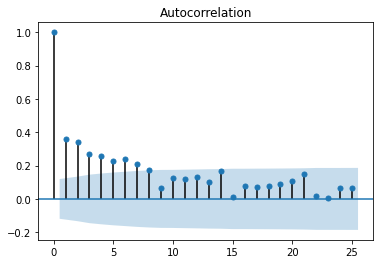

In [ ]:
# В остатках присутствует автокорреляция
# Также можно увидеть на графиках ACF и PACF
sm.graphics.tsa.plot_acf(res_pooled.resid.squeeze(), lags=25)
plt.show()

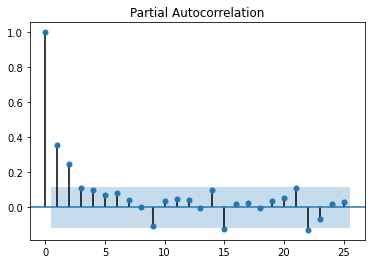

In [ ]:
sm.graphics.tsa.plot_pacf(res_pooled.resid, lags=25)
plt.show()

In [ ]:
print(sm.stats.diagnostic.het_breuschpagan(res_pooled.resid, res_pooled.model.exog)[2])
print(sm.stats.diagnostic.het_breuschpagan(res_pooled.resid, res_pooled.model.exog)[3])

116.04467086011759
9.8605350780821e-23


In [ ]:
# Нулевая гипотеза о гомоскедастичности остатков отвергается, в данных есть проблема гетероскедастичности

In [ ]:
res_pooled_hac = pooled.fit(cov_type='HAC', cov_kwds={'maxlags':1})

In [ ]:
print(res_pooled_hac.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.582
Model:                            OLS   Adj. R-squared (uncentered):              0.580
Method:                 Least Squares   F-statistic:                              178.9
Date:                Thu, 22 Oct 2020   Prob (F-statistic):                    1.25e-31
Time:                        04:41:45   Log-Likelihood:                         -148.75
No. Observations:                 270   AIC:                                      299.5
Df Residuals:                     269   BIC:                                      303.1
Df Model:                           1                                                  
Covariance Type:                  HAC                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

Кроме Pooled модели можно попробовать построить модель Fixed Effects (FE) Model, Random Effects (RE) Model, Between Effects (BE) model.

In [ ]:
!pip install linearmodels

In [ ]:
from linearmodels import PanelOLS
from linearmodels import RandomEffects
from linearmodels import BetweenOLS

In [ ]:
df_all = df_all.set_index(['id', 't'])

In [ ]:
df_all

shop  Footfall  ...  Conversion  Cl/Footfall
id   t                                      ...                         
3287 44066  Edinburgh Princes St       311  ...       0.559        0.183
     44067  Edinburgh Princes St       409  ...       0.601        0.174
     44068  Edinburgh Princes St       207  ...       0.599        1.000
     44069  Edinburgh Princes St       381  ...       0.567        0.239
     44070  Edinburgh Princes St       344  ...       0.610        0.378
...                          ...       ...  ...         ...          ...
3228 44091            Chelmsford       361  ...       0.798        0.211
     44092            Chelmsford       499  ...       0.565        0.309
     44093            Chelmsford       664  ...       0.586        0.125
     44094            Chelmsford       408  ...       0.505        0.252
     44095            Chelmsford       469  ...       0.601        0.206

[270 rows x 8 columns]

In [ ]:
fe = PanelOLS(df_all['Conversion'], df_all['Cl/Footfall'], entity_effects = True)
fe_res = fe.fit()
print(fe_res.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Conversion   R-squared:                        0.0100
Estimator:                   PanelOLS   R-squared (Between):              0.0294
No. Observations:                 270   R-squared (Within):               0.0100
Date:                Thu, Oct 22 2020   R-squared (Overall):              0.0291
Time:                        04:41:47   Log-likelihood                    325.59
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      2.6218
Entities:                           9   P-value                           0.1066
Avg Obs:                       30.000   Distribution:                   F(1,260)
Min Obs:                       30.000                                           
Max Obs:                       30.000   F-statistic (robust):             2.6218
                            

/usr/local/lib/python3.6/dist-packages/linearmodels/panel/data.py:98: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_categorical(s):


FE - модель, оценивающие межвременные различия объектов из выборки. Качество подгонки модели FE оценивается с помощью R^2 within. Это значение очень низкое, кроме этого модель не значима для уровня 5% и для 10% тоже. Поэтому, несмотря на значимость индивидуальных эффектов, такая модель не подходит.

In [ ]:
be = BetweenOLS(df_all['Conversion'], df_all['Cl/Footfall'])
be_res = be.fit()
print(be_res.summary)

                         BetweenOLS Estimation Summary                          
Dep. Variable:             Conversion   R-squared:                        0.8720
Estimator:                 BetweenOLS   R-squared (Between):              0.8720
No. Observations:                   9   R-squared (Within):              -33.418
Date:                Thu, Oct 22 2020   R-squared (Overall):              0.4404
Time:                        04:41:48   Log-likelihood                    0.4271
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      54.498
Entities:                           9   P-value                           0.0001
Avg Obs:                       30.000   Distribution:                     F(1,8)
Min Obs:                       30.000                                           
Max Obs:                       30.000   F-statistic (robust):             54.498
                            

/usr/local/lib/python3.6/dist-packages/linearmodels/panel/data.py:98: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_categorical(s):


BE - это модель, оценивающая межгрупповые различия между объектами (магазинами). Качество подгонки модели BE оценивается с помощью R^2 between. Как мы видим его значение довольно высокое (0.872).

BE отвечает на вопрос как сильно различается конверсия для магазинов с разными значениями отношения клики/трафик.
FE модель отвечает на вопрос как сильно увеличится конверсия для магазина при изменении показателя клики/трафик в данном магазине.

In [ ]:
re = RandomEffects(df_all['Conversion'], df_all['Cl/Footfall'])
re_res = re.fit()
print(re_res.summary)

                        RandomEffects Estimation Summary                        
Dep. Variable:             Conversion   R-squared:                        0.0147
Estimator:              RandomEffects   R-squared (Between):              0.0394
No. Observations:                 270   R-squared (Within):               0.0088
Date:                Thu, Oct 22 2020   R-squared (Overall):              0.0390
Time:                        04:41:48   Log-likelihood                    297.51
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      4.0017
Entities:                           9   P-value                           0.0465
Avg Obs:                       30.000   Distribution:                   F(1,269)
Min Obs:                       30.000                                           
Max Obs:                       30.000   F-statistic (robust):             4.0017
                            

/usr/local/lib/python3.6/dist-packages/linearmodels/panel/data.py:98: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_categorical(s):


RE - модель, учитывающая влияние переменных на временные и межгрупповые эффекты. RE сути, взвешенное среднее FE и BE. Такая модель предполагает, что все переменные имеют одинаковый cross-sectional и time-series эффект. Можно это показать.

In [ ]:
df_all

shop  Footfall  ...  Conversion  Cl/Footfall
id   t                                      ...                         
3287 44066  Edinburgh Princes St       311  ...       0.559        0.183
     44067  Edinburgh Princes St       409  ...       0.601        0.174
     44068  Edinburgh Princes St       207  ...       0.599        1.000
     44069  Edinburgh Princes St       381  ...       0.567        0.239
     44070  Edinburgh Princes St       344  ...       0.610        0.378
...                          ...       ...  ...         ...          ...
3228 44091            Chelmsford       361  ...       0.798        0.211
     44092            Chelmsford       499  ...       0.565        0.309
     44093            Chelmsford       664  ...       0.586        0.125
     44094            Chelmsford       408  ...       0.505        0.252
     44095            Chelmsford       469  ...       0.601        0.206

[270 rows x 8 columns]

In [ ]:
mean_on_id = df_all.mean(level='id')['Cl/Footfall']
mean_on_id

id
3287    0.233
3085    0.104
3647    0.107
3042    0.253
3743    0.293
3312    0.171
3494    0.141
3270    0.280
3228    0.106
Name: Cl/Footfall, dtype: float64

In [ ]:
empty = []
for i in range(9):
  for j in range(30):
    empty.append(mean_on_id.iloc[i])
df_all['mean_x'] = empty

In [ ]:
df_all['diff'] = df_all['Cl/Footfall'] - df_all['mean_x']

In [ ]:
re = RandomEffects(df_all['Conversion'], df_all[['mean_x', 'diff']])
re_res = re.fit()
print(re_res.summary)

/usr/local/lib/python3.6/dist-packages/linearmodels/panel/data.py:98: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_categorical(s):


                        RandomEffects Estimation Summary                        
Dep. Variable:             Conversion   R-squared:                        0.1585
Estimator:              RandomEffects   R-squared (Between):              0.8720
No. Observations:                 270   R-squared (Within):               0.0100
Date:                Thu, Oct 22 2020   R-squared (Overall):              0.8611
Time:                        04:41:48   Log-likelihood                    322.00
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      25.248
Entities:                           9   P-value                           0.0000
Avg Obs:                       30.000   Distribution:                   F(2,268)
Min Obs:                       30.000                                           
Max Obs:                       30.000   F-statistic (robust):             25.248
                            

Как мы видим, коэффициценты в модели RE такие же как в BE и FE. То есть cross-sectional и time-series эффекты сильно отличаются. Если магазины различаются в параметре Click/Footfall на 0,1, то в среднем они отличаются в конверсии на 0,299. При этом, если Click/Footfall в одном конкретном магазине увеличится на 0,1, то конверсия увеличится в среднем только на 0,051. 

Но часто интересен time-series эффект, а качество этой модели плохое, поэтому несмотря на наличие значимых индивидуальных эффектов итоговый результат будем смотреть по Pooled модели.

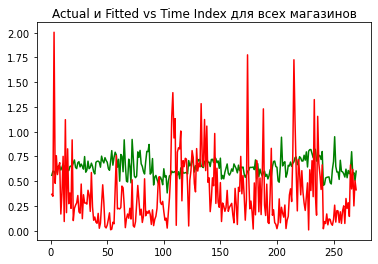

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
line1, = ax.plot(np.arange(1,271), df_all['Conversion'], color = 'green')
line2, = ax.plot(np.arange(1,271), res_pooled.predict(), color = 'red')
plt.title(str('Actual и Fitted vs Time Index для всех магазинов'))
plt.show()

Text(0.5, 1.0, 'Actual vs Fitted для всех магазинов')

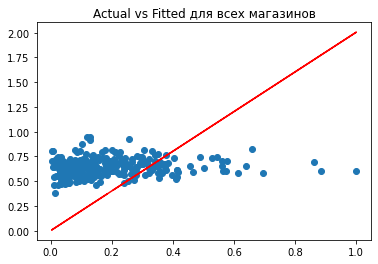

In [ ]:
  plt.scatter(df_all['Cl/Footfall'], df_all['Conversion'])
  plt.plot(df_all['Cl/Footfall'],  res_pooled.predict(), color = 'red')
  plt.title(str('Actual vs Fitted для всех магазинов'))

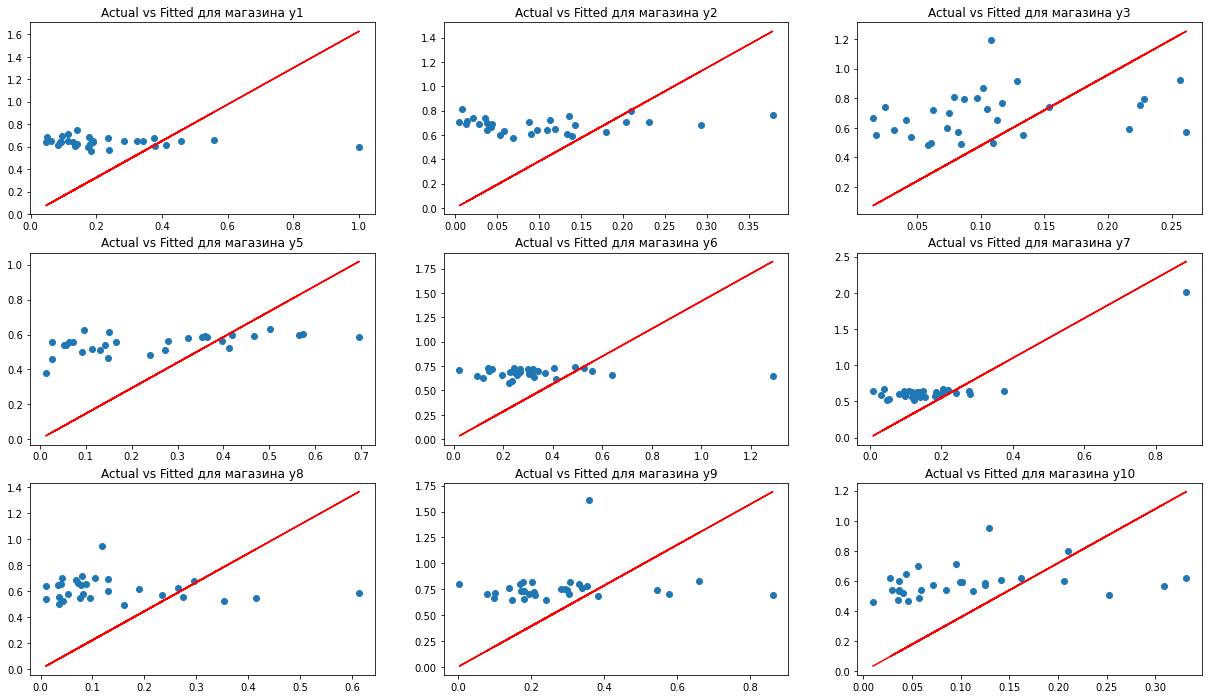

In [ ]:
# Actual vs Fitted для каждого магазина
plt.figure(figsize=(21, 12))
for i, model in enumerate(model_list):  
  plt.subplot(3, 3, i+1)
  plt.scatter(df['x{}'.format(shops_ind[i])], df['y{}'.format(shops_ind[i])])
  plt.plot(df['x{}'.format(shops_ind[i])],  model.predict(), color = 'red')
  plt.title(str('Actual vs Fitted для магазина ') + str('y{}'.format(shops_ind[i])))
plt.show()

Видно, что добавление константы улучшит ситуацию, но по условиям задания модели должны быть без нее

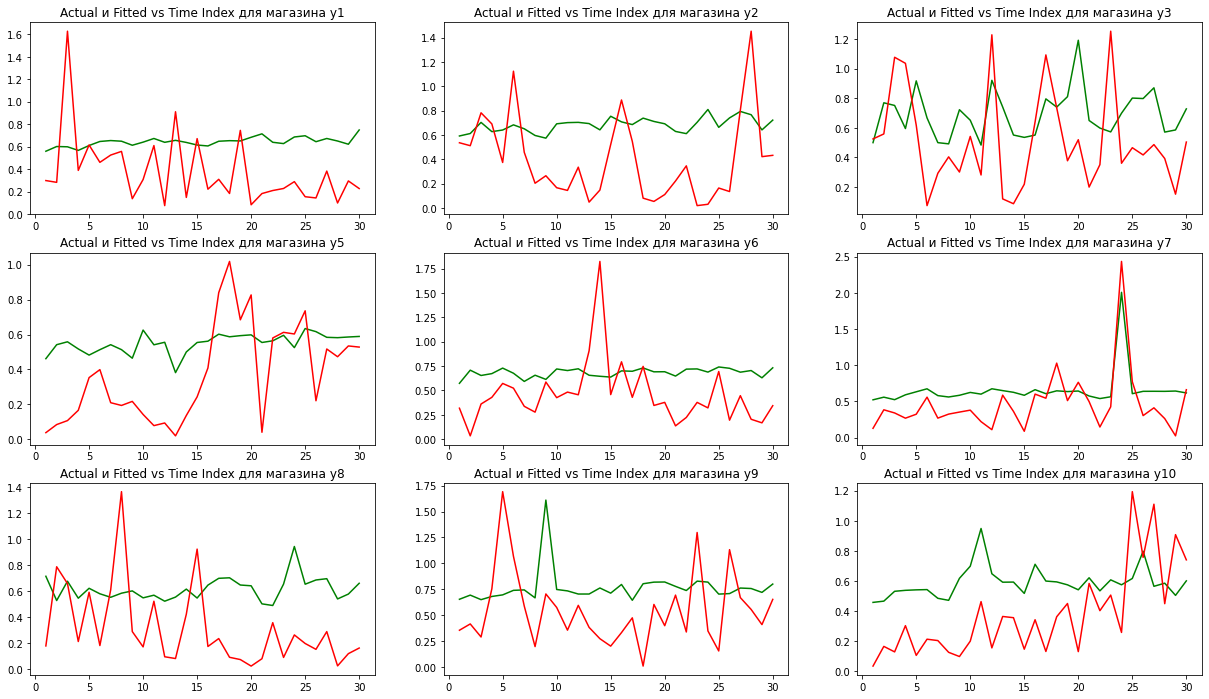

In [ ]:
# Actual и Fitted vs Time Index  для каждого магазина
plt.figure(figsize=(21, 12))
for i, model in enumerate(model_list):  
  plt.subplot(3, 3, i+1)
  plt.plot(np.arange(1,len(df)+1), df['y{}'.format(shops_ind[i])], color = 'green')
  plt.plot(np.arange(1, len(df)+1), model.predict(), color = 'red')
  plt.title(str('Actual и Fitted vs Time Index для магазина ') + str('y{}'.format(shops_ind[i])))
plt.show()

### Задание 2 ###

In [ ]:
file2 = 'Looks_Data'
x2 = pd.ExcelFile(file2)
df_looks = x2.parse('result 1')
df_looks.head(5)

,product_id,look_id,look_created_on,model,look_updated_on
0,2987354,235480,2020-02-19 18:21:44.773000,437875,2020-07-14 07:47:46.365000
1,2855723,235480,2020-02-19 18:21:44.773000,127922,2020-07-14 07:47:46.365000
2,2573660,235480,2020-02-19 18:21:44.773000,2996413,2020-07-14 07:47:46.365000
3,2914539,235480,2020-02-19 18:21:44.773000,247936,2020-07-14 07:47:46.365000
4,2863824,235480,2020-02-19 18:21:44.773000,967858,2020-07-14 07:47:46.365000


In [ ]:
df_looks.sort_values(by = ['product_id', 'look_id', 'look_created_on'], inplace =True)
df_looks

,product_id,look_id,look_created_on,model,look_updated_on
24538,2285688,135154,2019-04-29 12:54:36.138000,8565384,2020-03-12 10:57:06.231000
22570,2285688,139039,2019-05-27 17:47:22.972000,8565384,2020-03-12 10:58:09.203000
20517,2285691,129052,2019-03-27 11:20:09.845000,1565028,2020-03-12 10:55:47.962000
23834,2285691,129059,2019-03-27 11:34:06.048000,1565028,2020-03-12 10:55:48.204000
23986,2285691,129060,2019-03-27 11:37:23.956000,1565028,2020-03-12 10:55:48.456000
...,...,...,...,...,...
110374,3324292,295479,2020-09-30 19:39:56.438000,2998742,2020-09-30 19:39:56.438000
120463,3327094,292339,2020-09-25 09:06:04.988000,6818617,2020-09-25 10:39:36.881000
73129,3327094,294336,2020-09-29 08:10:59.329000,6818617,2020-09-30 14:56:13.498000
100616,3327095,292206,2020-09-24 19:27:01.906000,6818838,2020-09-25 08:48:50.733000


In [ ]:
count_list = [1]
k = 1
for i in range(0, len(df_looks['product_id'])-1):
  if df_looks['product_id'].iloc[i+1] == df_looks['product_id'].iloc[i]: 
    k +=1
    count_list.append(k)
  else:
    k = 1
    count_list.append(k)
  

In [ ]:
df_looks['look_count'] = count_list
df_looks

,product_id,look_id,look_created_on,model,look_updated_on,look_count
24538,2285688,135154,2019-04-29 12:54:36.138000,8565384,2020-03-12 10:57:06.231000,1
22570,2285688,139039,2019-05-27 17:47:22.972000,8565384,2020-03-12 10:58:09.203000,2
20517,2285691,129052,2019-03-27 11:20:09.845000,1565028,2020-03-12 10:55:47.962000,1
23834,2285691,129059,2019-03-27 11:34:06.048000,1565028,2020-03-12 10:55:48.204000,2
23986,2285691,129060,2019-03-27 11:37:23.956000,1565028,2020-03-12 10:55:48.456000,3
...,...,...,...,...,...,...
110374,3324292,295479,2020-09-30 19:39:56.438000,2998742,2020-09-30 19:39:56.438000,18
120463,3327094,292339,2020-09-25 09:06:04.988000,6818617,2020-09-25 10:39:36.881000,1
73129,3327094,294336,2020-09-29 08:10:59.329000,6818617,2020-09-30 14:56:13.498000,2
100616,3327095,292206,2020-09-24 19:27:01.906000,6818838,2020-09-25 08:48:50.733000,1


In [ ]:
df_looks[df_looks['look_count']<=15]

,product_id,look_id,look_created_on,model,look_updated_on,look_count
24538,2285688,135154,2019-04-29 12:54:36.138000,8565384,2020-03-12 10:57:06.231000,1
22570,2285688,139039,2019-05-27 17:47:22.972000,8565384,2020-03-12 10:58:09.203000,2
20517,2285691,129052,2019-03-27 11:20:09.845000,1565028,2020-03-12 10:55:47.962000,1
23834,2285691,129059,2019-03-27 11:34:06.048000,1565028,2020-03-12 10:55:48.204000,2
23986,2285691,129060,2019-03-27 11:37:23.956000,1565028,2020-03-12 10:55:48.456000,3
...,...,...,...,...,...,...
81142,3324292,295243,2020-09-30 14:11:29.570000,2998742,2020-09-30 14:46:03.785000,15
120463,3327094,292339,2020-09-25 09:06:04.988000,6818617,2020-09-25 10:39:36.881000,1
73129,3327094,294336,2020-09-29 08:10:59.329000,6818617,2020-09-30 14:56:13.498000,2
100616,3327095,292206,2020-09-24 19:27:01.906000,6818838,2020-09-25 08:48:50.733000,1
